### ====================== Reading in the segmentation label file using SimpleITK and getting the unique integer values in the label file using numpy ======================
A dictionary class_names is defined to map the label values to class names. The names of the classes corresponding to the label values are obtained by iterating over the unique labels and using the class_names dictionary to map the label values to class names. The names of the classes are printed to the console.

In [1]:
import os
import numpy as np
import SimpleITK as sitk
# Set the path to the segmentation label file
seg_path = 'train/BraTS20_Training_001/BraTS20_Training_001_seg.nii'
# Read in the segmentation label file
seg = sitk.ReadImage(seg_path)
# Get the unique integer values in the label file
unique_labels = np.unique(sitk.GetArrayFromImage(seg))
# Print the number of unique labels and their values
num_classes = len(unique_labels)
print(f"Number of classes: {num_classes}")
print(f"Class values: {unique_labels}")
# Define a dictionary to map the label values to class names
class_names = {
    0: "background (no tumor part)",
    1: "non-enhancing tumor (a.k.a necrotic) ",
    2: "edema",
    4: "enhancing tumor"
}
# Get the names of the classes corresponding to the label values
class_names_list = [class_names[label] for label in unique_labels]
# Print the names of the classes
print(f"Class names: {class_names_list}")

Number of classes: 4
Class values: [0 1 2 4]
Class names: ['background (no tumor part)', 'non-enhancing tumor (a.k.a necrotic) ', 'edema', 'enhancing tumor']


### ====================== Identifing the number of slices in each volume (i.e., each *_flair.nii file) in the BraTS2020 dataset ======================

In [2]:
import os
import SimpleITK as sitk
# Set the paths to the training and validation data directories
train_dir = 'train'
val_dir = 'val'
# Loop over the training and validation directories
for data_dir in [train_dir, val_dir]:
    print(f"Data directory: {data_dir}")
    # Get a list of the patient directories
    patient_dirs = sorted(os.listdir(data_dir))
    # Loop over the patient directories
    for patient_dir in patient_dirs:
        # Get the path to the flair image for this patient
        flair_path = os.path.join(data_dir, patient_dir, f"{patient_dir}_flair.nii.gz")
        # Read in the image using SimpleITK
        flair_img = sitk.ReadImage(flair_path)
        # Get the number of slices in the image
        num_slices = flair_img.GetSize()[2]
        # Print the number of slices
        print(f"{patient_dir}: {num_slices} slices")


Data directory: train
BraTS20_Training_001: 155 slices
BraTS20_Training_002: 155 slices
BraTS20_Training_003: 155 slices
BraTS20_Training_004: 155 slices
BraTS20_Training_005: 155 slices
BraTS20_Training_006: 155 slices
BraTS20_Training_007: 155 slices
BraTS20_Training_008: 155 slices
BraTS20_Training_009: 155 slices
BraTS20_Training_010: 155 slices
BraTS20_Training_011: 155 slices
BraTS20_Training_012: 155 slices
BraTS20_Training_013: 155 slices
BraTS20_Training_014: 155 slices
BraTS20_Training_015: 155 slices
BraTS20_Training_016: 155 slices
BraTS20_Training_017: 155 slices
BraTS20_Training_018: 155 slices
BraTS20_Training_019: 155 slices
BraTS20_Training_020: 155 slices
BraTS20_Training_021: 155 slices
BraTS20_Training_022: 155 slices
BraTS20_Training_023: 155 slices
BraTS20_Training_024: 155 slices
BraTS20_Training_025: 155 slices
BraTS20_Training_026: 155 slices
BraTS20_Training_027: 155 slices
BraTS20_Training_028: 155 slices
BraTS20_Training_029: 155 slices
BraTS20_Training_030:

### ====================== Visualizing Volumes for all five MRI sequences for each patient ======================

In [3]:
patient_id = 'BraTS20_Training_001'
images_types_present = ['flair', 'seg', 't1', 't1ce', 't2']

Below are the plots for 30th and 70th slice of the 1st image.
From this we can see that the seg.nii file is the ground truth file showing the segmentation mask


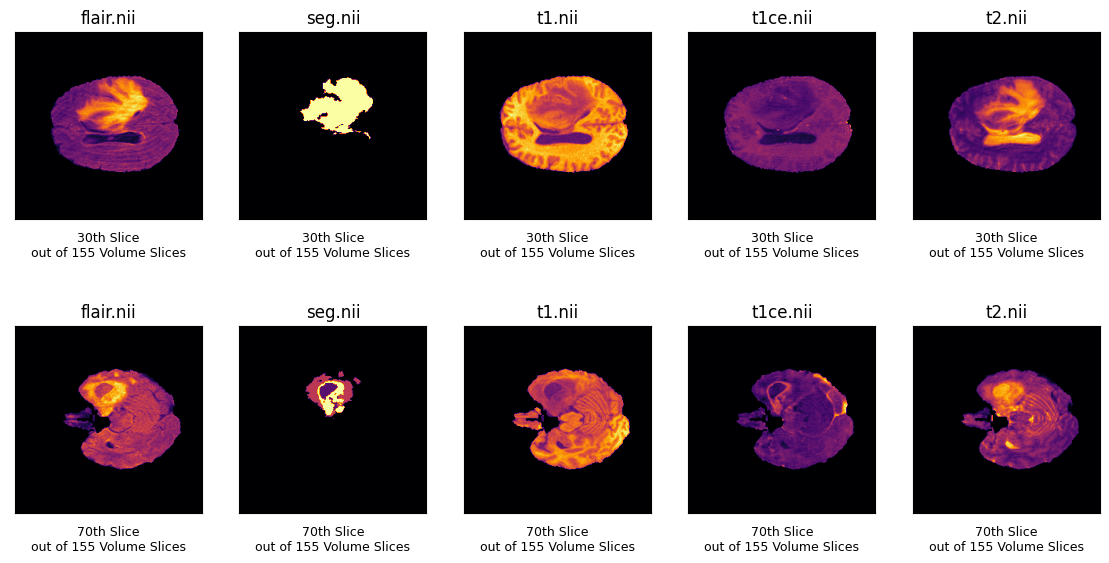

In [4]:
import nibabel as ni
import matplotlib.pyplot as plt
volume_slice_count = [30,70]
print('Below are the plots for 30th and 70th slice of the 1st image.\nFrom this we can see that the seg.nii file is the ground truth file showing the segmentation mask')
fig, axes = plt.subplots(2, len(images_types_present), figsize=(14, 7))
for j, volume_count in enumerate(volume_slice_count):
    for i, image_type in enumerate(images_types_present):
        images_types_path = f"{train_dir}/{patient_id}/{patient_id}_{image_type}.nii"
        images_types_data = ni.load(images_types_path).get_fdata()
        # images_types_data is a three-dimensional array representing a medical image dataset for a particular image type in the dataset (e.g., FLAIR, T1, etc.). 
        # The expression images_types_data.shape[0] // 2 - volume_slice_count calculates the index of a two-dimensional slice of the image data to be displayed. 
        # Specifically, it selects the slice that is approximately in the middle of the image volume along the first (0th) axis.
        # [:, :, images_types_data.shape[0] // 2 - volume_slice_count] selects all rows and columns of the two-dimensional slice indexed by the expression images_types_data.shape[0] // 2 - volume_slice_count. 
        # This is because the slice to be displayed is selected along the first axis (which represents the depth of the image volume), while the remaining two axes represent the width and height of the image.
        axes[j, i].imshow(images_types_data[:, :, images_types_data.shape[0] // 2 - volume_count], cmap='inferno')
        axes[j ,i].set_title(image_type+'.nii')
        axes[j, i].set_xticks([]) # remove x tick labels
        axes[j, i].set_yticks([]) # remove y tick labels
        axes[j, i].text(0.5, -0.2, f'{volume_count}th Slice\nout of 155 Volume Slices', fontsize=9, transform=axes[j, i].transAxes, ha='center') # add slice value above plot
plt.show()

In [5]:
# import matplotlib.animation as animation
# import matplotlib.pyplot as plt
# import nibabel as ni
# slice_count = 155
# fig, axes = plt.subplots(1, len(images_types_present), figsize=(14, 7))
# # Move the slice counter above the images
# slice_counter = fig.text(0.4, 0.18, f'Slice Number: 0', fontsize=16)
# descOFdataset = fig.text(0.01, 0.8, 'The dataset contains $\\mathbf{five}$ MRI sequences for each patient:\n\n1) $\\mathbf{flair.nii}$: FLAIR stands for Fluid Attenuated Inversion Recovery. FLAIR images are often used to help identify areas of abnormal tissue in the brain, such as tumors.\n                    This is an MRI sequence that is sensitive to fluid in the brain, such as cerebrospinal fluid (CSF) and edema.\n2) $\\mathbf{seg.nii}$: This file contains the segmentation labels for each voxel in the corresponding image volumes.\n3) $\\mathbf{t1.nii}$: They are often used to help distinguish between different types of tissue in the brain, such as gray matter and white matter.\n4) $\\mathbf{t1ce.nii}$: They are T1-weighted images with contrast enhancement. In this sequence, a contrast agent is injected into the patient\'s bloodstream to help highlight areas of abnormal tissue, such as tumors.\n5) $\\mathbf{t2.nii}$: T2-weighted images are often used to help identify areas of edema and inflammation in the brain.',  ha='left',fontsize=9)
# fig.tight_layout()
# def update(i):
#     for j, image_type in enumerate(images_types_present):
#         images_types_path = f"{train_dir}/{patient_id}/{patient_id}_{image_type}.nii"
#         images_types_data = ni.load(images_types_path).get_fdata()
#         axes[j].imshow(images_types_data[:, :, i], cmap='inferno')
#         axes[j].set_title(image_type+'.nii')
#         axes[j].set_xticks([]) # remove x tick labels
#         axes[j].set_yticks([]) # remove y tick labels
#     slice_counter.set_text(f'Slice Number: {i}/155')
# ani = animation.FuncAnimation(fig, update, frames=slice_count, interval=100, repeat=True)
# ani.save('visualize_slices.gif', writer='pillow')
# plt.close(fig)

In [6]:
from IPython.display import HTML
HTML('<img src="visualize_slices.gif">')

### ====================== Defining Performance Metrics for Model Evaluation ======================

We are prefering a metric called Dice Coefficient (Sørensen–Dice index) because it measures the similarity between two sets of data, in this case the predicted segmentation mask and the ground truth mask. It ranges from 0 to 1, where 1 indicates a perfect match between the two masks. The Dice coefficient is commonly used in medical image analysis to evaluate the accuracy of segmentation algorithms.




The dice_coef_necrotic, dice_coef_edema, and dice_coef_enhancing functions calculate the Dice coefficient for each individual class (necrotic, edema, and enhancing, respectively) using the same method as dice_coef. These functions are used to evaluate the performance of the segmentation algorithm for each class separately.

The reason why Dice coefficient is needed for all classes is to evaluate the performance of the segmentation algorithm for each class separately. Since different classes of brain tumors have different characteristics, it is important to evaluate the algorithm's performance for each class individually to identify any weaknesses or areas for improvement. Additionally, calculating the Dice coefficient for all classes allows for a comprehensive evaluation of the algorithm's performance overall.

In [5]:
from keras import backend as K

# DEFINING Sørensen–Dice index Functions
def dice_coef(mask_true, mask_pred, smooth=1.0):
    '''
    dice_coef function calculates the average Dice coefficient for all four classes of brain tumors in the dataset. 
    The function loops over each class of the segmentation problem and calculates the Dice coefficient for that class using the flattened versions of mask_true and mask_pred. 
    The coefficients are then averaged across all classes to give the final result.
    BY THEORY,
                    --------------------------------------------------------------------------------------------------------------------------- 
                    |                                                                                                                         |
                    |                                        overlapping pixels between ground truth and predicted segmentation masks         |
                    |       DICE        =       2    x     _____________________________________________________________________________      |
                    |    COEFFICIENT                                                                                                          |
                    |                                         total pixels in the ground truth and predicted segmentation masks               |
                    |                                                                                                                         |
                    ---------------------------------------------------------------------------------------------------------------------------

    :param mask_true: tensor representing the ground truth segmentation masks for a batch of images.
    :param mask_pred: tensor representing the predicted segmentation masks for the same batch of images.
    :param smooth: this is a smoothing parameter that is added to the numerator and denominator of the Dice coefficient to avoid division by zero. The default value is 1.0.

    :var flatenned_mask_true: represents the flattened version of the i-th channel of 'mask_true' for the current iteration of the loop.
    :var flatenned_mask_pred: represents the flattened version of the i-th channel of 'mask_pred' for the current iteration of the loop.
    :var intersectionOverlap: the number of overlapping pixels between the ground truth mask and the predicted mask.
    :extra K.sum(flatenned_mask_true): is the total number of pixels in the ground truth mask.
    :extra K.sum(flatenned_mask_pred): is the total number of pixels in the predicted mask.

    :return: function returns the AVERAGE Dice coefficient across all four classes of brain tumors in the dataset. The four classes being referred are:
                    0: "background (no tumor part)"
                    1: "non-enhancing tumor (a.k.a necrotic) "
                    2: "edema"
                    4: "enhancing tumor"
             Specifically, it returns the variable 'total_loss', which is ====> sum of the Dice coefficients for all four classes divided by the number of classes, hence the average.  
             The value of the Dice coefficient ranges between 0 and 1, with a value of 1 indicating a perfect segmentation match between the predicted and ground truth masks, and a value of 0 indicating no overlap between the predicted and ground truth masks. 
                
    '''
    number_of_classes = 4
    dice_coeffs = []
    for i in range(number_of_classes):
        # Using Keras backend functions, which allows for the use of GPU acceleration during training
        flatenned_mask_true = K.flatten(mask_true[:,:,:,i])
        flatenned_mask_pred = K.flatten(mask_pred[:,:,:,i])
        intersectionOverlap = K.sum(flatenned_mask_true * flatenned_mask_pred) # intersectionOverlap is the number of overlapping pixels between the ground truth mask and the predicted mask
        calculated_diceCoeff = ((2. * intersectionOverlap + smooth) / (K.sum(flatenned_mask_true) + K.sum(flatenned_mask_pred) + smooth))
        dice_coeffs.append(calculated_diceCoeff)
    total_diceCoeff_for_all_classes = K.mean(K.stack(dice_coeffs))
    K.print_tensor(total_diceCoeff_for_all_classes, message=' Average Dice coefficient: ')
    return total_diceCoeff_for_all_classes



def dice_coef_nonenhancing(mask_true, mask_pred, epsilon=1e-6):
    intersectionOverlap = K.sum(K.abs(mask_true[:,:,:,1] * mask_pred[:,:,:,1]))
    return (2. * intersectionOverlap) / (K.sum(K.square(mask_true[:,:,:,1])) + K.sum(K.square(mask_pred[:,:,:,1])) + epsilon)


def dice_coef_edema(mask_true, mask_pred, epsilon=1e-6):
    intersectionOverlap = K.sum(K.abs(mask_true[:,:,:,2] * mask_pred[:,:,:,2]))
    return (2. * intersectionOverlap) / (K.sum(K.square(mask_true[:,:,:,2])) + K.sum(K.square(mask_pred[:,:,:,2])) + epsilon)


def dice_coef_enhancing(mask_true, mask_pred, epsilon=1e-6):
    intersectionOverlap = K.sum(K.abs(mask_true[:,:,:,3] * mask_pred[:,:,:,3]))
    return (2. * intersectionOverlap) / (K.sum(K.square(mask_true[:,:,:,3])) + K.sum(K.square(mask_pred[:,:,:,3])) + epsilon)

def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [6]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D,UpSampling2D, concatenate, Dropout
from keras.optimizers import Adam
from keras.metrics import MeanIoU

def build_unet(inputs, ker_init, dropout):
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)
    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = Dropout(dropout)(conv5)
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)
    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)
    conv10 = Conv2D(4, (1,1), activation = 'softmax')(conv)
    return Model(inputs = inputs, outputs = conv10)
input_layer = Input((128, 128, 2))

model = build_unet(input_layer, 'he_normal', 0.2)

model.compile(loss="categorical_crossentropy", optimizer= Adam(learning_rate=0.001), metrics = ['accuracy', MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_nonenhancing, dice_coef_edema ,dice_coef_enhancing] )

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 2  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 32  608         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 128, 128, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [8]:
import os
from sklearn.model_selection import train_test_split
train_directories = [os.path.join('train/', d) for d in os.listdir('train/') if os.path.isdir(os.path.join('train/', d))]
def extractIDS(dirList):
    return [os.path.basename(d) for d in dirList]
train_and_test_ids = extractIDS(train_directories)
train_test_ids, val_ids = train_test_split(train_and_test_ids, test_size=0.2)
train_ids, test_ids = train_test_split(train_test_ids, test_size=0.15)

In [9]:
from keras.utils import Sequence
import cv2
import tensorflow as tf
import numpy as np
import nibabel as ni

model_batch_size = 14

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(128,128), batch_size = model_batch_size, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples'
        X = np.zeros((self.batch_size*110, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*110, 240, 240))
        Y = np.zeros((self.batch_size*110, *self.dim, 4))

        IMG_SIZE = 128
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join('train', i)

            data_path = os.path.join(case_path, f'{i}_flair.nii');
            flair = ni.load(data_path).get_fdata()    

            data_path = os.path.join(case_path, f'{i}_t1ce.nii');
            ce = ni.load(data_path).get_fdata()
            
            data_path = os.path.join(case_path, f'{i}_seg.nii');
            seg = ni.load(data_path).get_fdata()
        
            for j in range(110):
                 X[j +110*c,:,:,0] = cv2.resize(flair[:,:,j+20], (IMG_SIZE, IMG_SIZE))
                 X[j +110*c,:,:,1] = cv2.resize(ce[:,:,j+20], (IMG_SIZE, IMG_SIZE))
                 y[j +110*c] = seg[:,:,j+20]
        y[y==4] = 3
        mask = tf.one_hot(y, 4)
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE))
        return X/np.max(X), Y
        
training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)

In [10]:
from keras.callbacks import CSVLogger,ReduceLROnPlateau, ModelCheckpoint
csv_logger = CSVLogger('training.log', separator=',', append=False)

callbacks = [
      ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=2), ModelCheckpoint(filepath='model_weights.h5', monitor='val_loss', verbose=2, save_best_only=True, save_weights_only=True), csv_logger]

In [ ]:
history =  model.fit(training_generator,epochs=80,steps_per_epoch=len(train_ids)/model_batch_size,callbacks= callbacks,validation_data = valid_generator)  

In [ ]:
model.save('model.h5')

In [ ]:
import pandas as pd
from keras.models import load_model
model = load_model('model.h5', custom_objects={ 'accuracy' : tf.keras.metrics.MeanIoU(num_classes=4),"dice_coef": dice_coef,"precision": precision,"sensitivity":sensitivity,"specificity":specificity,"dice_coef_necrotic": dice_coef_nonenhancing,"dice_coef_edema": dice_coef_edema,"dice_coef_enhancing": dice_coef_enhancing}, compile=False)
history = pd.read_csv('training.log', sep=',', engine='python')

model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_nonenhancing, dice_coef_edema, dice_coef_enhancing] )

results = model.evaluate(test_generator, batch_size=100, callbacks= callbacks)


In [ ]:
print('loss: ' ,results[0] , '\naccuracy: ', results[1],  '\nmean_io_u: ',results[2],'\ndice_coef: ', results[3],'\nprecision: ', results[4],'\nsensitivity: ', results[5], '\nspecificity: ',results[6], '\ndice_coef_nonenhancing: ',results[7], '\ndice_coef_edema: ',results[8], '\ndice_coef_enhancing: ', results[9])

5/5 [==============================] - 3s 642ms/step


<Figure size 1800x5000 with 0 Axes>

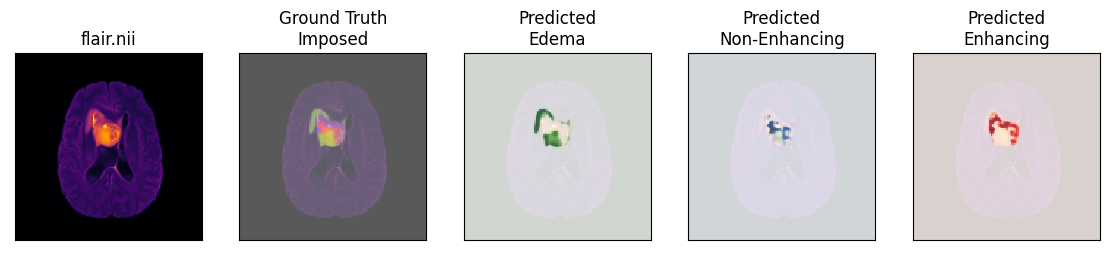

5/5 [==============================] - 3s 657ms/step


<Figure size 1800x5000 with 0 Axes>

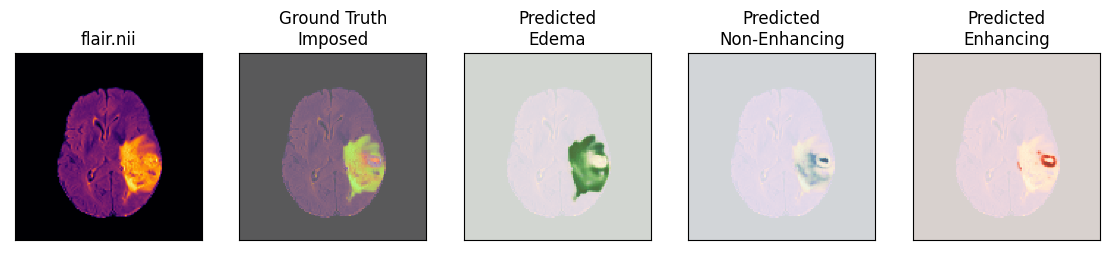

5/5 [==============================] - 3s 632ms/step


<Figure size 1800x5000 with 0 Axes>

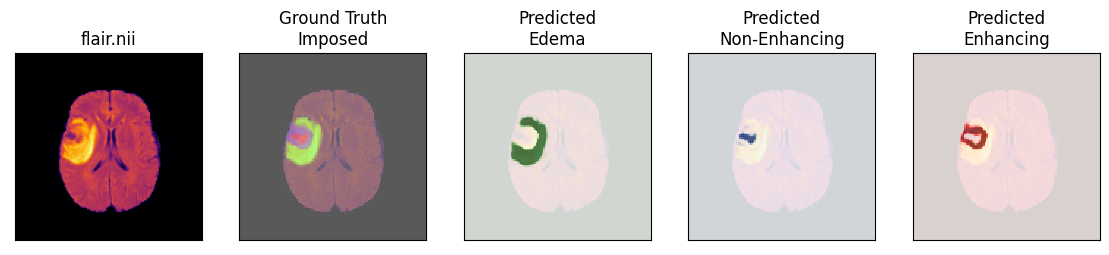

5/5 [==============================] - 3s 659ms/step


<Figure size 1800x5000 with 0 Axes>

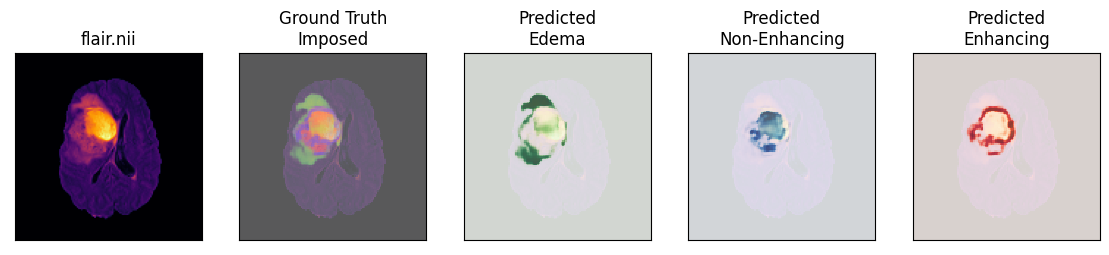

5/5 [==============================] - 3s 651ms/step


<Figure size 1800x5000 with 0 Axes>

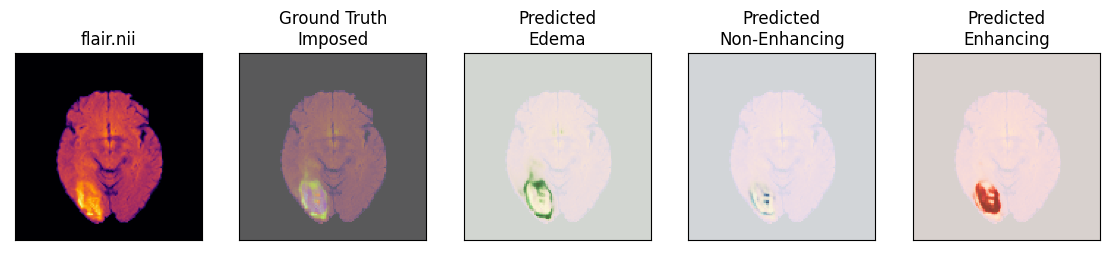

5/5 [==============================] - 3s 662ms/step


<Figure size 1800x5000 with 0 Axes>

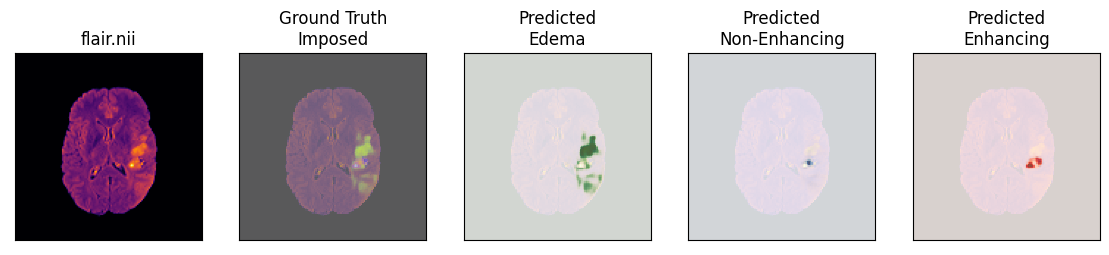

5/5 [==============================] - 3s 649ms/step


<Figure size 1800x5000 with 0 Axes>

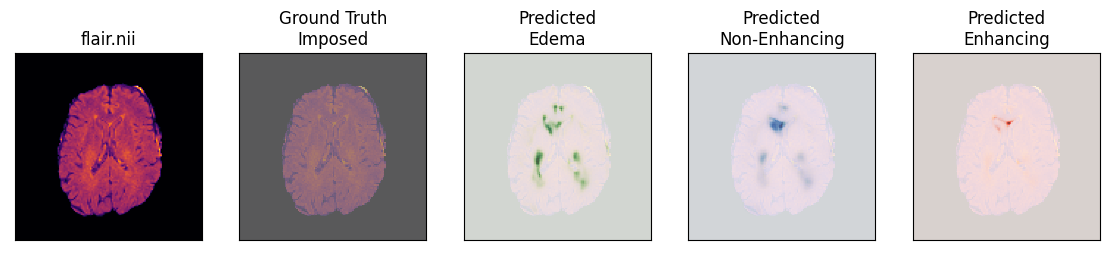

5/5 [==============================] - 3s 675ms/step


<Figure size 1800x5000 with 0 Axes>

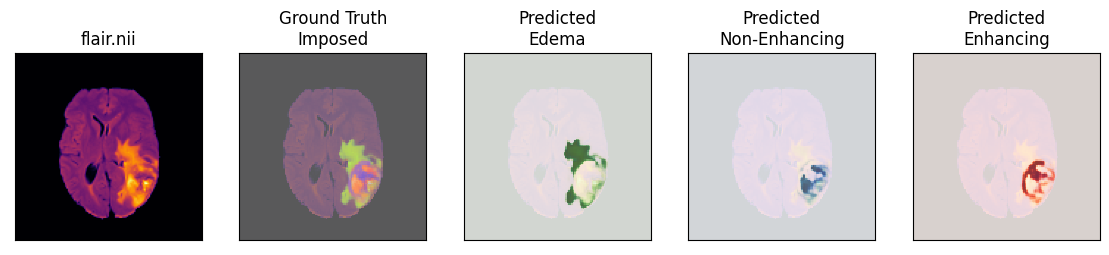

In [74]:
def predictions_plot(case, sliceNumber):
    path = f"train/BraTS20_Training_{case}"
    gt = ni.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
    origImage = ni.load(os.path.join(path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()
    files = next(os.walk(path))[2]
    X = np.empty((155, 128, 128, 2))   
    vol_path = os.path.join(path, f'BraTS20_Training_{case}_flair.nii');
    flair=ni.load(vol_path).get_fdata()
    vol_path = os.path.join(path, f'BraTS20_Training_{case}_t1ce.nii');
    ce=ni.load(vol_path).get_fdata() 
    for j in range(155):
        X[j,:,:,0] = cv2.resize(flair[:,:,j], (128,128))
        X[j,:,:,1] = cv2.resize(ce[:,:,j], (128,128))
    p = model.predict(X/np.max(X), verbose=1)
    nonenhancing = p[:,:,:,1]
    edema= p[:,:,:,2]
    enhancing = p[:,:,:,3]
    plt.figure(figsize=(18, 50))
    f, prediction_axes = plt.subplots(1,5, figsize = (14, 7)) 
    for i in range(5):
        prediction_axes[i].imshow(np.rot90(cv2.resize(origImage[:,:,sliceNumber], (128, 128)), k=3), cmap="inferno",alpha=0.5, interpolation='none')
        prediction_axes[i].set_xticks([]) 
        prediction_axes[i].set_yticks([])
    flairImage = cv2.resize(origImage[:,:,sliceNumber], (128, 128))
    flairImage = np.rot90(flairImage, k=3)
    prediction_axes[0].imshow(flairImage, cmap="inferno")
    prediction_axes[0].title.set_text('flair.nii')
    
    groundTruthImage = p[sliceNumber,:,:,1:4]
    groundTruthImage = np.rot90(groundTruthImage, k=3)  
    prediction_axes[1].imshow(groundTruthImage, cmap="OrRd", interpolation='none', alpha=0.3)
    prediction_axes[1].title.set_text('Ground Truth\nImposed')

    predictedEdemaImage = edema[sliceNumber,:,:]
    predictedEdemaImage = np.rot90(predictedEdemaImage, k=3)
    prediction_axes[2].imshow(predictedEdemaImage, cmap="Greens", interpolation='none', alpha=0.7)
    prediction_axes[2].title.set_text('Predicted\nEdema')

    predictedNonEnhancingImage = nonenhancing[sliceNumber,:,]
    predictedNonEnhancingImage = np.rot90(predictedNonEnhancingImage, k=3)
    prediction_axes[3].imshow(predictedNonEnhancingImage, cmap="Blues", interpolation='none', alpha=0.7)
    prediction_axes[3].title.set_text('Predicted\nNon-Enhancing')

    predictedEnhancingImage = enhancing[sliceNumber,:,]
    predictedEnhancingImage = np.rot90(predictedEnhancingImage, k=3)
    prediction_axes[4].imshow(predictedEnhancingImage, cmap="Reds", interpolation='none', alpha=0.7)
    prediction_axes[4].title.set_text('Predicted\nEnhancing')
    plt.show()

predictions_plot(test_ids[36][-3:],80)
predictions_plot(test_ids[38][-3:],80)   
predictions_plot(test_ids[0][-3:],80)
predictions_plot(test_ids[2][-3:],80)
predictions_plot(test_ids[3][-3:],80)
predictions_plot(test_ids[5][-3:],80)
predictions_plot(test_ids[6][-3:],80)
predictions_plot(test_ids[35][-3:],80)

#TODO: MAKE GIF FOR SLICES